In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

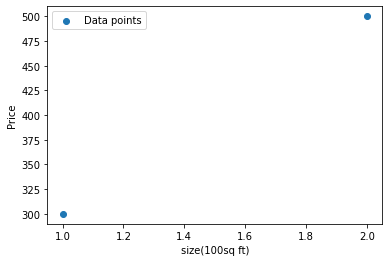

In [17]:
xTrain = np.array([[1.],[2.]], dtype=np.float32)
yTrain = np.array([[300.],[500.]], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(xTrain, yTrain, label="Data points")
ax.legend()
ax.set_ylabel("Price")
ax.set_xlabel("size(100sq ft)")


plt.show()

In [32]:
# Adding a single layer
linearLayer = tf.keras.layers.Dense(units = 1, activation = "linear")
linearLayer.get_weights()
a1 = linearLayer(xTrain[0].reshape(1,1))

In [35]:
w, b = linearLayer.get_weights()
print(f"w = {w}, b={b}")

w = [[200.]], b=[100.]


In [42]:
set_w = np.array([[200]])
set_b = np.array([100])

linearLayer.set_weights([set_w, set_b])
print(linearLayer.get_weights())

# Checking the linear activation results generated by tensorflow
a1 = linearLayer(xTrain[0].reshape(1,1))
print(a1)
print(np.dot(set_w, xTrain[0].reshape(1,1))+set_b)

# Using the NN to predict
predictionTf = linearLayer(xTrain)
predictionTf = np.dot( xTrain, set_w) + set_b

[array([[200.]], dtype=float32), array([100.], dtype=float32)]
tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


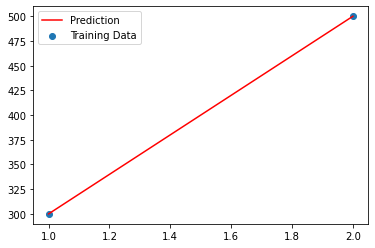

In [49]:
plt.scatter(xTrain, yTrain, label="Training Data")
plt.plot(xTrain, predictionTf, "r", label = "Prediction")
plt.legend()
plt.show()

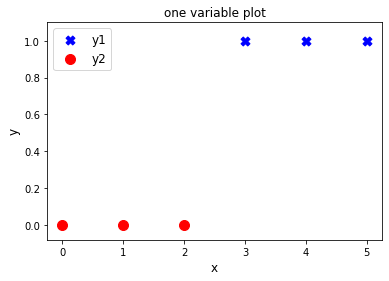

In [71]:
xTrain = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
yTrain = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

pos = yTrain == 1
neg = yTrain == 0

# Display the positive numbers
xTrain[pos]

fix, ax = plt.subplots(1,1)
ax.scatter(xTrain[pos], yTrain[pos], c = "b", marker = "X", s = 80, label = "y1")
ax.scatter(xTrain[neg], yTrain[neg], c = "r", marker = "o", s = 100, label = "y2")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [72]:
model = Sequential(
    [
        tf.keras.layers.Dense(units=1, input_dim = 1, activation = "sigmoid", name = "L1")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [79]:
logisticLayer = model.get_layer("L1")
w,b = logisticLayer.get_weights()
print(w,b)
print(w.shape,b.shape)

set_w = np.array([[2]])
set_b = np.array([-4.5])

logisticLayer.set_weights([set_w, set_b])
print(logisticLayer.get_weights())

[[-0.7821212]] [0.]
(1, 1) (1,)
[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [83]:
a1 = model.predict(xTrain[0].reshape(-1,1))
print(a1)
alog = 1/(1+np.exp(-(np.dot(set_w, xTrain[0])+set_b)))
print(alog)

1/1 [==============================] - 0s 16ms/step
[[0.01098694]]
[0.01098694]
